In [23]:
from os.path import join
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def show(img):
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(img)
    # plt.axis('off')
    plt.show()

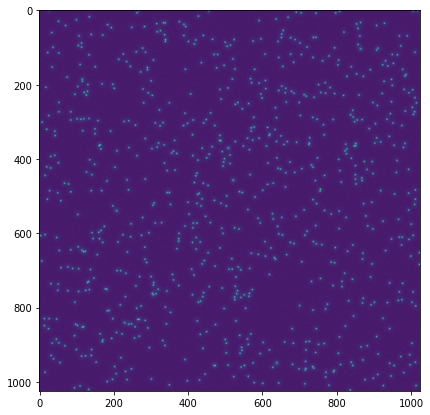

In [24]:
base_dir = '/Users/mackenzie/Desktop/ece278a'
fp = join(base_dir, 'full-image-random-7.5e-3/calib_-11.0.tif')

img = io.imread(fp)

img = img * 10

show(img)

In [21]:
hf, wf = np.shape(img)

print("Width: {}, Height: {}".format(wf, hf))

Width: 1024, Height: 1024


## Left Panel

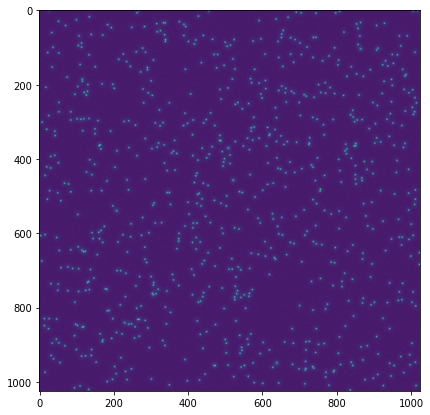

In [88]:
w = 256

lp = img[:, :]

io.imsave(join(base_dir, 'skimage/full.tif'), lp)
show(lp)

## Define function for overlapped image coordinates

In [81]:
def overlap_coords(img, h0=256, percent_overlap=25):
    h = np.shape(img)[0]

    num_images = (h - h0) / (h0 - h0 * percent_overlap / 100) + 1
    print(num_images)
    
    if num_images % 1 != 0:
        print(num_images)
        raise ValueError("number of images is not integer")
        
    num_images = int(num_images)
    
    h_i, h_f = 0, h0
    
    coords = [[h_i, h_f]]
    for n in range(num_images - 1):
        
        h_i = h_f - h0 * percent_overlap / 100
        h_f = h_i + h0
        
        coords.append([h_i, h_f])
    
    return coords

In [76]:
overlap_coords(lp, h0=256, percent_overlap=25)

5.0


[[0, 256], [192.0, 448.0], [384.0, 640.0], [576.0, 832.0], [768.0, 1024.0]]

In [89]:
def save_subimages(img, coords, path):
    
    for i, coordx in enumerate(coords):
        w_i, w_f = coordx
        w_i = int(w_i)
        w_f = int(w_f)
        
        for j, coordy in enumerate(coords):
            
            h_i, h_f = coordy
            h_i = int(h_i)
            h_f = int(h_f)

            sub = img[h_i:h_f, w_i:w_f]
            print("Image (i, j) ({}, {}): {}".format(i, j, np.shape(sub)))

            if np.shape(sub)[0] != 256:
                raise ValueError("images are not the same shape")

            io.imsave(join(base_dir, 'skimage/overlap_{}percent/image_i{}_j{}.tif').format(path, i, j), sub)

## Left Panel - Percent Overlap

In [91]:
percent_overlap=25

coords = overlap_coords(lp, h0=256, percent_overlap=percent_overlap)
save_subimages(lp, coords, path=percent_overlap)

5.0
Image (i, j) (0, 0): (256, 256)
Image (i, j) (0, 1): (256, 256)
Image (i, j) (0, 2): (256, 256)
Image (i, j) (0, 3): (256, 256)
Image (i, j) (0, 4): (256, 256)
Image (i, j) (1, 0): (256, 256)
Image (i, j) (1, 1): (256, 256)
Image (i, j) (1, 2): (256, 256)
Image (i, j) (1, 3): (256, 256)
Image (i, j) (1, 4): (256, 256)
Image (i, j) (2, 0): (256, 256)
Image (i, j) (2, 1): (256, 256)
Image (i, j) (2, 2): (256, 256)
Image (i, j) (2, 3): (256, 256)
Image (i, j) (2, 4): (256, 256)
Image (i, j) (3, 0): (256, 256)
Image (i, j) (3, 1): (256, 256)
Image (i, j) (3, 2): (256, 256)
Image (i, j) (3, 3): (256, 256)
Image (i, j) (3, 4): (256, 256)
Image (i, j) (4, 0): (256, 256)
Image (i, j) (4, 1): (256, 256)
Image (i, j) (4, 2): (256, 256)
Image (i, j) (4, 3): (256, 256)
Image (i, j) (4, 4): (256, 256)


In [79]:
print(768 / 8)

96.0
